In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import patches, patheffects
import torch
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

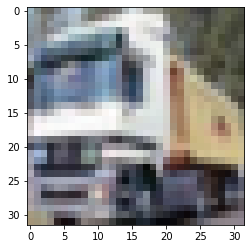

In [4]:
plt.imshow(x_train[1])

In [5]:
# fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# sns.countplot(y_train.ravel(), ax=axs[0])
# axs[0].set_title('Distribution of training data')
# axs[0].set_xlabel('Classes')
# sns.countplot(y_test.ravel(), ax=axs[1])
# axs[1].set_title('Distribution of Testing data')
# axs[1].set_xlabel('Classes')
# plt.show()

In [6]:
batch_size = 50  # The default batch size of keras.
num_class = 10  # Number of class for the dataset
epochs = 50
data_augmentation = False

In [7]:
# initialize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

# label
y_train = keras.utils.to_categorical(y_train,num_class)
y_test = keras.utils.to_categorical(y_test,num_class)

In [8]:
# alexnet
def alexnn(model):
    # CONV => RELU =>NORM =>POOL LAWYER 1
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(BatchNormalization()) 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # CONV => RELU =>NORM =>POOL LAWYER 2
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization()) 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # CONV => RELU => CONV => RELU  LAWYER 3 & 4
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))

    # CONV => RELU =>POOL LAWYER 5
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # FLATTERN => DENSE => RELU => DROPOUT LAWYER6
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # LAWYER7
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # a softmax classifier LAWYER 8
    model.add(Dense(num_class))
    model.add(Activation('softmax'))
    return model

In [9]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model1 = Sequential()
model_1 = alexnn(model1)
model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'SGD', #adam,SGD
    metrics = ['accuracy'],
)

In [10]:
Trainning1 = model_1.fit(
    x_train,y_train,
    batch_size = batch_size,
    epochs = 100,
    validation_data = (x_test,y_test)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 180us/step - loss: 1.9492 - accuracy: 0.2583 - val_loss: 1.5822 - val_accuracy: 0.4208
Epoch 2/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.5227 - accuracy: 0.4386 - val_loss: 1.6394 - val_accuracy: 0.4033
Epoch 3/100
50000/50000 [==============================] - 6s 118us/step - loss: 1.3402 - accuracy: 0.5163 - val_loss: 1.2398 - val_accuracy: 0.5477
Epoch 4/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.2161 - accuracy: 0.5672 - val_loss: 1.2255 - val_accuracy: 0.5538
Epoch 5/100
50000/50000 [==============================] - 6s 120us/step - loss: 1.1217 - accuracy: 0.6050 - val_loss: 1.1436 - val_accuracy: 0.5957
Epoch 6/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.0525 - accuracy: 0.6312 - val_loss: 0.9987 - val_accuracy: 0.6433
Epoch 7/100
50000/50000 [==============================]

In [11]:
model_1.save('model_1.h5')

In [12]:
new_model_1 = keras.models.load_model('model_1.h5')

In [13]:
# data_augmentation = True
# history = None  # For recording the history of trainning process.
# if not data_augmentation:
#     print('Not using data augmentation.')
#     history = model.fit(x_train, y_train,
#               batch_size=batch_size,
#               epochs=epochs,
#               validation_data=(x_test, y_test),
#               shuffle=True)
# else:
#     print('Using real-time data augmentation.')
#     # This will do preprocessing and realtime data augmentation:
#     datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         zca_epsilon=1e-06,  # epsilon for ZCA whitening
#         rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
#         # randomly shift images horizontally (fraction of total width)
#         width_shift_range=0.1,
#         # randomly shift images vertically (fraction of total height)
#         height_shift_range=0.1,
#         shear_range=0.,  # set range for random shear
#         zoom_range=0.,  # set range for random zoom
#         channel_shift_range=0.,  # set range for random channel shifts
#         # set mode for filling points outside the input boundaries
#         fill_mode='nearest',
#         cval=0.,  # value used for fill_mode = "constant"
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False,  # randomly flip images
#         # set rescaling factor (applied before any other transformation)
#         rescale=None,
#         # set function that will be applied on each input
#         preprocessing_function=None,
#         # image data format, either "channels_first" or "channels_last"
#         data_format=None,
#         # fraction of images reserved for validation (strictly between 0 and 1)
#         validation_split=0.0)

#     # Compute quantities required for feature-wise normalization
#     # (std, mean, and principal components if ZCA whitening is applied).
#     datagen.fit(x_train)

#     # Fit the model on the batches generated by datagen.flow().
#     history = model_1.fit_generator(datagen.flow(x_train, y_train,
#                                     batch_size=batch_size),
#                                     epochs = 50,
#                                     validation_data=(x_test, y_test),
#                                     workers=4)

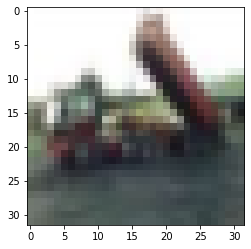

In [14]:
plt.imshow(x_train[2])

In [15]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

In [16]:
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred_1 = model_1.predict(x_test)

10000/10000 [==============================] - 1s 82us/step
Test loss: 1.7455400728225707
Test accuracy: 0.729200005531311


In [17]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

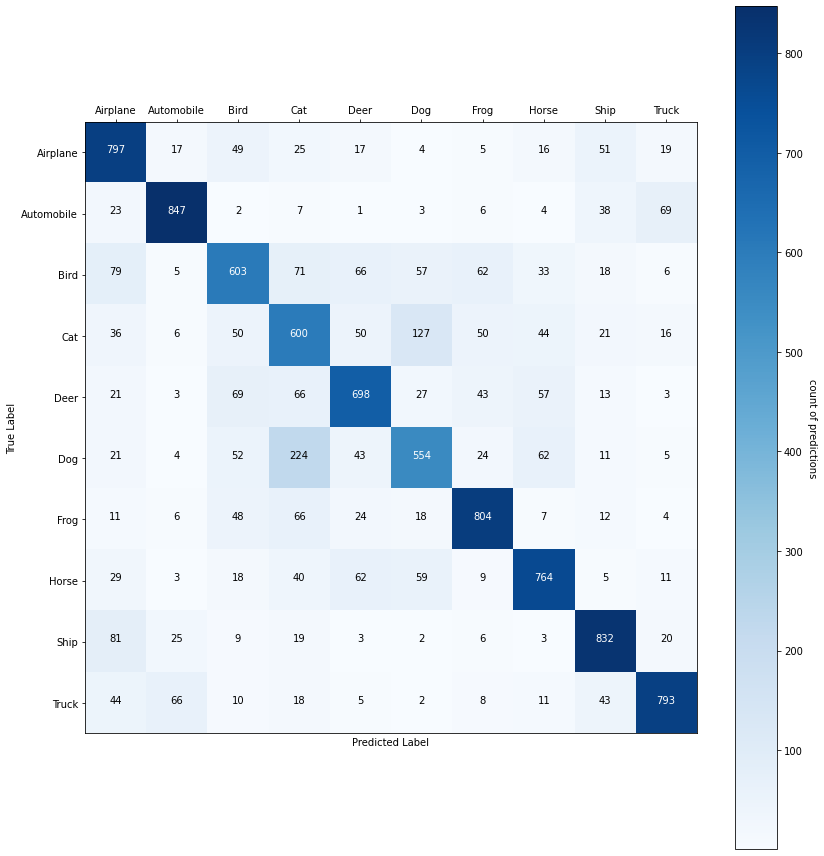

In [18]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_1, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred_1[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [19]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74      1000
           1       0.86      0.85      0.85      1000
           2       0.66      0.60      0.63      1000
           3       0.53      0.60      0.56      1000
           4       0.72      0.70      0.71      1000
           5       0.65      0.55      0.60      1000
           6       0.79      0.80      0.80      1000
           7       0.76      0.76      0.76      1000
           8       0.80      0.83      0.81      1000
           9       0.84      0.79      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



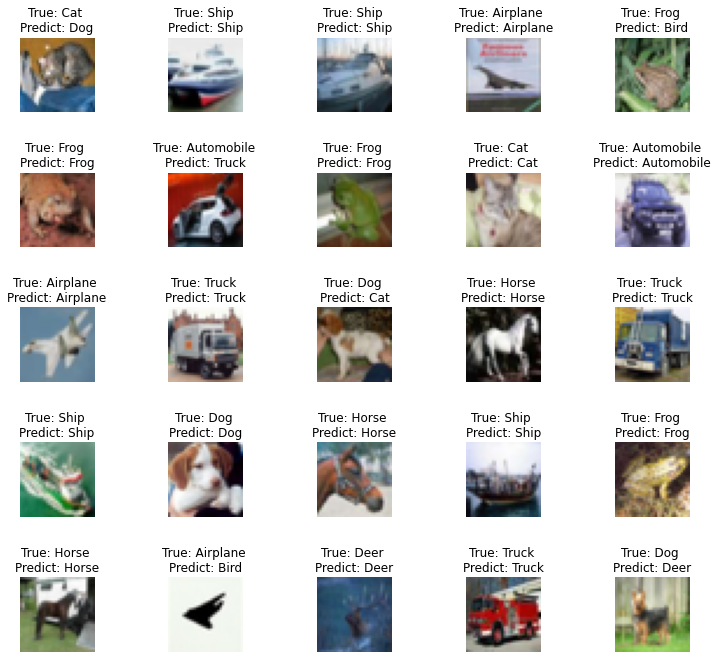

In [20]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

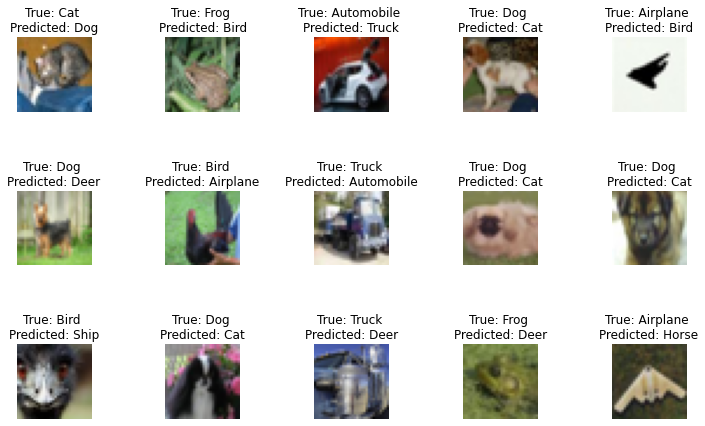

In [21]:
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [22]:
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'keras_cifar10_trained_model.h5'

# # Save model and weights
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

# # Score trained model.
# scores = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

In [23]:
def rand_bbox(size,lam): #选取分割框
    w = size[1]
    h = size[2]
    cut_rat = np.sqrt(1.-lam)
    cut_w = np.int(w * cut_rat)
    cut_h = np.int(h * cut_rat)
    cx = np.random.randint(w)
    cy = np.random.randint(h)
    bbx1 = np.clip(cx - cut_w//2,0,w)
    bby1 = np.clip(cy - cut_h//2,0,h)
    bbx2 = np.clip(cx + cut_w//2,0,w)
    bby2 = np.clip(cy + cut_h//2,0,h)
    return bbx1,bby1,bbx2,bby2

In [24]:
rand_index = torch.randperm(50000)

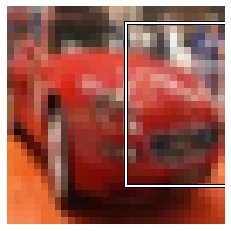

In [25]:


def show_img(img, ax=None, figsize=(4,4)):
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.axis('off')
    return ax

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b, text=None):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)
    if text:
        text = ax.text(b[0]+1, b[1], text, verticalalignment='top',fontsize=14, weight='bold', color='white')
        draw_outline(text, 2)

ax = show_img(x_train[5])
bx = rand_bbox(x_train.shape,0.5)
draw_rect(ax,bx)

In [26]:
criterion = keras.losses.SparseCategoricalCrossentropy()
x_input2 = np.array(x_train)
y_input2 = np.array(y_train)


In [27]:
# cutmix 训练集数据转换
for i in range(50000):
    target = y_train[i]
    a1 = np.random.randint(1,10)        
    lam = np.random.beta(a1, a1)
#     target_a = y_train[i]  
#     target_b = y_train[rand_index[i]] 
    #        生成剪裁区域B
    bbx1, bby1, bbx2, bby2 = rand_bbox(x_train.shape, lam)
    #        4.将原有的样本A中的B区域，替换成样本B中的B区域"
            #打乱顺序后的batch组和原有的batch组进行替换[对应id下]
    x_input2[i,bbx1:bbx2, bby1:bby2,:] = x_train[rand_index[i], bbx1:bbx2, bby1:bby2,:]
           
     #       """5.根据剪裁区域坐标框的值调整lam的值"""
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (32*32))
    #     """7.按lamda值分配权重"""
    y_input2[i] = y_train[i] * lam + y_train[rand_index[i]] * (1. - lam)


In [28]:
# i = 1
# target = y_train[i]
# a1 = np.random.randint(1,10)        
# lam = np.random.beta(a1, a1)
# target_a = y_train[i]  
# target_b = y_train[rand_index[i]] 
# #        生成剪裁区域B
# bbx1, bby1, bbx2, bby2 = rand_bbox(x_train[3].shape, lam)
# #        4.将原有的样本A中的B区域，替换成样本B中的B区域"
#         #打乱顺序后的batch组和原有的batch组进行替换[对应id下]
# x_input2[i,bbx1:bbx2, bby1:bby2,:] = x_train[rand_index[i], bbx1:bbx2, bby1:bby2,:]

#  #       """5.根据剪裁区域坐标框的值调整lam的值"""
# lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (32*32))
# #     """7.按lamda值分配权重"""
# y_input2[i] = target_a * lam + target_b * (1. - lam)

In [29]:
y_input2.shape

(50000, 10)

In [30]:
x_input22 = np.zeros((100000,32,32,3))
y_input22 = np.zeros((100000,10))

In [31]:
x_input22 = np.zeros((100000,32,32,3))
y_input22 = np.zeros((100000,10))
x_input22[:50000] = x_train
x_input22[50000:] = x_input2
y_input22[:50000] = y_train
y_input22[50000:] = y_input2

In [32]:
# import random
# random.shuffle(x_train[:5],y_train[:5])

0.8046875

In [33]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model2 = Sequential()
model_2 = alexnn(model2)
# Let's train the model using RMSprop
model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'SGD', #adam,SGD
    metrics = ['accuracy'],
)

In [34]:
Trainning2 = model_2.fit(
    x_input22,y_input22,
    batch_size = batch_size,
    epochs = 100,
    validation_data = (x_test,y_test)
)

Train on 100000 samples, validate on 10000 samples
Epoch 1/100
100000/100000 [==============================] - 12s 121us/step - loss: 2.0303 - accuracy: 0.2453 - val_loss: 1.5983 - val_accuracy: 0.3932
Epoch 2/100
100000/100000 [==============================] - 12s 117us/step - loss: 1.7088 - accuracy: 0.4114 - val_loss: 1.5261 - val_accuracy: 0.4470
Epoch 3/100
100000/100000 [==============================] - 12s 119us/step - loss: 1.5678 - accuracy: 0.4853 - val_loss: 1.3024 - val_accuracy: 0.5374
Epoch 4/100
100000/100000 [==============================] - 12s 118us/step - loss: 1.4781 - accuracy: 0.5260 - val_loss: 1.3850 - val_accuracy: 0.5107
Epoch 5/100
100000/100000 [==============================] - 12s 117us/step - loss: 1.4138 - accuracy: 0.5554 - val_loss: 1.2840 - val_accuracy: 0.5509
Epoch 6/100
100000/100000 [==============================] - 12s 115us/step - loss: 1.3597 - accuracy: 0.5810 - val_loss: 1.2290 - val_accuracy: 0.5714
Epoch 7/100
100000/100000 [==========

In [35]:
x_input3 = np.array(x_train)
y_input3 = np.array(y_train)

In [36]:
for i in range(50000): #cutout
    #"""1.设定lamda的值，服从beta分布"""
    a2 = np.random.randint(1,10)        
    lam2 = np.random.beta(a2, a2)
    #        """3.生成剪裁区域B"""
    bbx1, bby1, bbx2, bby2 = rand_bbox(x_train.shape, lam2)
    #将对应剪裁区域换成0像素
    x_input3[i,bbx1:bbx2, bby1:bby2,:] = 0

 

<AxesSubplot:>

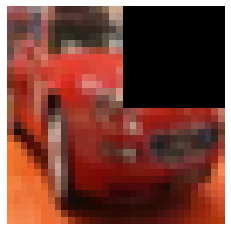

In [37]:
show_img(x_input3[5])

In [38]:
model3 = Sequential()
model_3 = alexnn(model3)
# Let's train the model using RMSprop
model_3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'SGD', #adam,SGD
    metrics = ['accuracy'],
)


In [39]:
x_input33 = np.zeros((100000,32,32,3))
y_input33 = np.zeros((100000,10))
x_input33[:50000] = x_train
x_input33[50000:] = x_input3
y_input33[:50000] = y_train
y_input33[50000:] = y_input3

In [38]:
Trainning3 = model_3.fit(
    x_input33,y_input33,
    batch_size = batch_size,
    epochs = 100,
    validation_data = (x_test,y_test)
)

Train on 100000 samples, validate on 10000 samples
Epoch 1/100
100000/100000 [==============================] - 13s 127us/step - loss: 1.8918 - accuracy: 0.2844 - val_loss: 1.4573 - val_accuracy: 0.4621
Epoch 2/100
100000/100000 [==============================] - 12s 124us/step - loss: 1.5295 - accuracy: 0.4374 - val_loss: 1.2434 - val_accuracy: 0.5439
Epoch 3/100
100000/100000 [==============================] - 12s 124us/step - loss: 1.3725 - accuracy: 0.5047 - val_loss: 1.2305 - val_accuracy: 0.5636
Epoch 4/100
100000/100000 [==============================] - 12s 124us/step - loss: 1.2772 - accuracy: 0.5450 - val_loss: 1.1248 - val_accuracy: 0.6007
Epoch 5/100
100000/100000 [==============================] - 12s 124us/step - loss: 1.2024 - accuracy: 0.5753 - val_loss: 1.0782 - val_accuracy: 0.6209
Epoch 6/100
100000/100000 [==============================] - 12s 124us/step - loss: 1.1471 - accuracy: 0.5971 - val_loss: 1.0511 - val_accuracy: 0.6266
Epoch 7/100
100000/100000 [==========

In [39]:
x_input4 = np.array(x_train)
y_input4 = np.array(y_train)
x_demo4 = np.array(x_train)
rand_index4 = torch.randperm(50000)

In [40]:
for i in range(50000): #mixup 按照0.5 + 0.5 混合
    # generate mixed sample
    target4_a = y_train[i]  #一个batch
    target4_b = y_train[rand_index4[i]] 

    x_demo4[i] =0.5 * x_input4[i] +0.5* x_train[rand_index4[i]]
    y_input4[i] = target4_a * 0.5 + target4_b * 0.5

In [41]:
x_input44 = np.zeros((100000,32,32,3))
y_input44 = np.zeros((100000,10))
x_input44[:50000] = x_train
x_input44[50000:] = x_demo4
y_input44[:50000] = y_train
y_input44[50000:] = y_input4

In [42]:
model4 = Sequential()
model_4 = alexnn(model4)
# Let's train the model using RMSprop
model_4.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'SGD', #adam,SGD
    metrics = ['accuracy'],
)

In [43]:
Trainning4 = model_4.fit(
    x_input44,y_input44,
    batch_size = batch_size,
    epochs = 100,
    validation_data = (x_test,y_test)
)

Train on 100000 samples, validate on 10000 samples
Epoch 1/100
100000/100000 [==============================] - 40s 397us/step - loss: 1.9740 - accuracy: 0.2661 - val_loss: 1.4494 - val_accuracy: 0.4770
Epoch 2/100
100000/100000 [==============================] - 37s 373us/step - loss: 1.7133 - accuracy: 0.3817 - val_loss: 1.3028 - val_accuracy: 0.5385
Epoch 3/100
100000/100000 [==============================] - 34s 336us/step - loss: 1.6132 - accuracy: 0.4251 - val_loss: 1.1710 - val_accuracy: 0.5864
Epoch 4/100
100000/100000 [==============================] - 21s 207us/step - loss: 1.5465 - accuracy: 0.4502 - val_loss: 1.1143 - val_accuracy: 0.6095
Epoch 5/100
100000/100000 [==============================] - 12s 124us/step - loss: 1.4969 - accuracy: 0.4699 - val_loss: 1.0765 - val_accuracy: 0.6265
Epoch 6/100
100000/100000 [==============================] - 12s 124us/step - loss: 1.4546 - accuracy: 0.4872 - val_loss: 1.0347 - val_accuracy: 0.6462
Epoch 7/100
100000/100000 [==========

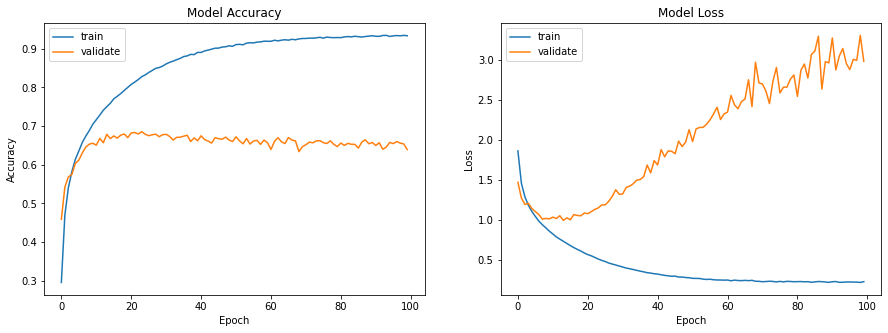

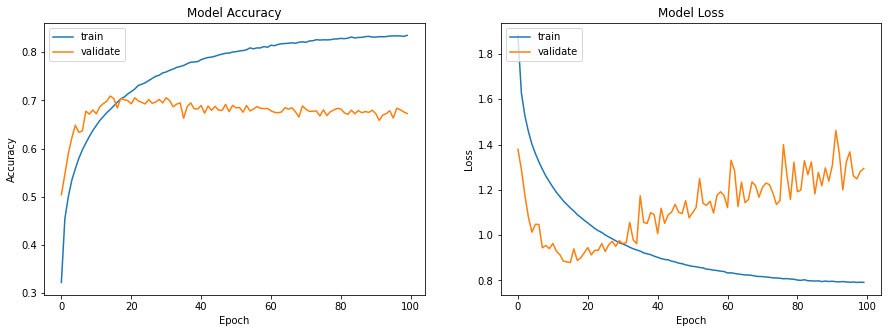

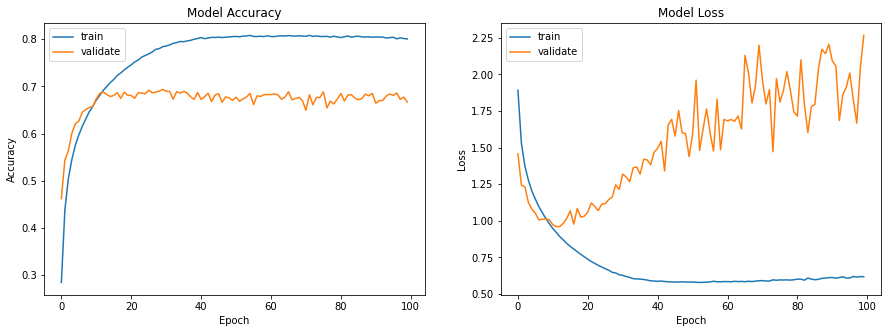

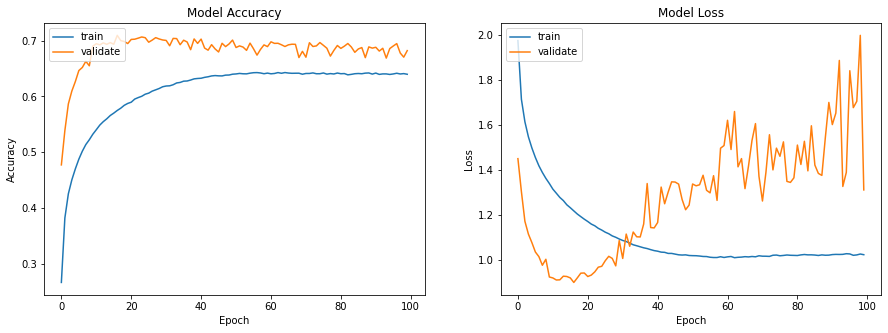

In [44]:
plotmodelhistory(Trainning1)
plotmodelhistory(Trainning2)
plotmodelhistory(Trainning3)
plotmodelhistory(Trainning4)

In [51]:
model_1.save('model_1')
model_2.save('model_2')
model_3.save('model_3')
model_4.save('model_4')

D:\ANACONDA\envs\tf-gpu\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [46]:
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 83us/step
Test loss: 2.982001106643677
Test accuracy: 0.6391000151634216


In [47]:
scores2 = model_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores2[0])
print('Test accuracy:', scores2[1])

10000/10000 [==============================] - 1s 77us/step
Test loss: 1.2941271220207213
Test accuracy: 0.6726999878883362


In [48]:
scores3 = model_3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores3[0])
print('Test accuracy:', scores3[1])

10000/10000 [==============================] - 1s 75us/step
Test loss: 2.2663731390953066
Test accuracy: 0.6668999791145325


In [49]:
scores4 = model_4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores4[0])
print('Test accuracy:', scores4[1])

10000/10000 [==============================] - 1s 78us/step
Test loss: 1.3105333938598633
Test accuracy: 0.6819999814033508
